In [1]:
import requests
import pandas as pd
from collections import defaultdict

#Call Ergast F1 API with the List of all current and past F1 Drivers. Check if response is "200" and therefore call was succesfull.
response = requests.get("http://ergast.com/api/f1/current/drivers.json?limit=1000")
print(response.status_code)

200


In [2]:
#read API response to JSON
json = response.json()

#format JSON to Table format
driver = defaultdict(list)

for item in json['MRData']['DriverTable']['Drivers']:
    try:
        driver['driverId'].append(item['driverId'])
    except:
        driver['driverId'].append(None)
            
    try:
        driver['givenName'].append(item['givenName'])
    except:
        driver['givenName'].append(None)

    try:
        driver['familyName'].append(item['familyName'])
    except:
        driver['familyName'].append(None)

    try:
        driver['nationality'].append(item['nationality'])
    except:
        driver['nationality'].append(None)

    try:
        driver['dateOfBirth'].append(item['dateOfBirth'])
    except:
        driver['dateOfBirth'].append(None)

    try:
        driver['url'].append(item['url'])
    except:
        driver['url'].append(None)

#Safe table format to pandas data frame        
df = pd.DataFrame(driver)

print(df)

#create a csv from the table
df.to_csv('Drivers List.csv')

           driverId  givenName  familyName nationality dateOfBirth  \
0             albon  Alexander       Albon        Thai  1996-03-23   
1            alonso   Fernando      Alonso     Spanish  1981-07-29   
2            bottas   Valtteri      Bottas     Finnish  1989-08-28   
3             gasly     Pierre       Gasly      French  1996-02-07   
4          hamilton      Lewis    Hamilton     British  1985-01-07   
5        hulkenberg       Nico  Hülkenberg      German  1987-08-19   
6            latifi   Nicholas      Latifi    Canadian  1995-06-29   
7           leclerc    Charles     Leclerc  Monegasque  1997-10-16   
8   kevin_magnussen      Kevin   Magnussen      Danish  1992-10-05   
9            norris      Lando      Norris     British  1999-11-13   
10             ocon    Esteban        Ocon      French  1996-09-17   
11            perez     Sergio       Pérez     Mexican  1990-01-26   
12        ricciardo     Daniel   Ricciardo  Australian  1989-07-01   
13          russell 

In [3]:
#Call Ergast F1 API with the List of all World Champions. Check if response is "200" and therefore call was succesfull.
response = requests.get("http://ergast.com/api/f1/driverStandings/1/drivers.json?limit=1000")
print(response.status_code)

200


In [4]:
#read API response to JSON
json2 = response.json()

#format JSON to Table format
standing = defaultdict(list)

for item in json2['MRData']['DriverTable']['Drivers']:
    try:
        standing['driverId'].append(item['driverId'])
    except:
        standing['driverId'].append(None)


#Safe table format to pandas data frame        
df2 = pd.DataFrame(standing)

print(df2)

#create a csv from the table
df2.to_csv('World Champions.csv')

              driverId
0               alonso
1       mario_andretti
2               ascari
3         jack_brabham
4               button
5                clark
6               fangio
7               farina
8   emerson_fittipaldi
9             hakkinen
10            hamilton
11            hawthorn
12           phil_hill
13          damon_hill
14                hill
15               hulme
16                hunt
17               jones
18               lauda
19             mansell
20              piquet
21               prost
22           raikkonen
23               rindt
24             rosberg
25        keke_rosberg
26           scheckter
27  michael_schumacher
28               senna
29             stewart
30             surtees
31      max_verstappen
32              vettel
33          villeneuve


In [5]:
#Add a new column to the drivers liste to indicate which driver is a WC and which not
df["Worldchampion"] = ""
df.to_csv('Drivers List.csv')

In [6]:
#Adding to the new column the value 1 if the driver is a WC and 0 if he is not
for i in range (len(df)):
    driverlist = df['driverId'].values[i]
    for z in range (len(df2)):
        worldchampion = df2['driverId'].values[z]
        if driverlist == worldchampion:
            df['Worldchampion'].values[i]=1
            break
        else:
            df['Worldchampion'].values[i]=0

In [7]:
# Set working directory
import os
cwd = os.getcwd()

# Warnings settings
import warnings
warnings.filterwarnings("ignore")

In [8]:
import io
from PIL import Image
import requests
import hashlib

In [9]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import pandas as pd
import seaborn as sns
import selenium
from selenium import webdriver
from PIL import Image
import requests
from io import BytesIO
import time

print(tf.__version__)

2.7.0


In [10]:
print (df)

           driverId  givenName  familyName nationality dateOfBirth  \
0             albon  Alexander       Albon        Thai  1996-03-23   
1            alonso   Fernando      Alonso     Spanish  1981-07-29   
2            bottas   Valtteri      Bottas     Finnish  1989-08-28   
3             gasly     Pierre       Gasly      French  1996-02-07   
4          hamilton      Lewis    Hamilton     British  1985-01-07   
5        hulkenberg       Nico  Hülkenberg      German  1987-08-19   
6            latifi   Nicholas      Latifi    Canadian  1995-06-29   
7           leclerc    Charles     Leclerc  Monegasque  1997-10-16   
8   kevin_magnussen      Kevin   Magnussen      Danish  1992-10-05   
9            norris      Lando      Norris     British  1999-11-13   
10             ocon    Esteban        Ocon      French  1996-09-17   
11            perez     Sergio       Pérez     Mexican  1990-01-26   
12        ricciardo     Daniel   Ricciardo  Australian  1989-07-01   
13          russell 

In [11]:
#df(
#    labels= ["fullname"],
#    axis=1,
#    inplace=True)

In [12]:
df["SearchName"] = df["givenName"] + " " + df["familyName"] + " Formula1 Portrait"
df

,driverId,givenName,familyName,nationality,dateOfBirth,url,Worldchampion,SearchName
0,albon,Alexander,Albon,Thai,1996-03-23,http://en.wikipedia.org/wiki/Alexander_Albon,0,Alexander Albon Formula1 Portrait
1,alonso,Fernando,Alonso,Spanish,1981-07-29,http://en.wikipedia.org/wiki/Fernando_Alonso,1,Fernando Alonso Formula1 Portrait
2,bottas,Valtteri,Bottas,Finnish,1989-08-28,http://en.wikipedia.org/wiki/Valtteri_Bottas,0,Valtteri Bottas Formula1 Portrait
3,gasly,Pierre,Gasly,French,1996-02-07,http://en.wikipedia.org/wiki/Pierre_Gasly,0,Pierre Gasly Formula1 Portrait
4,hamilton,Lewis,Hamilton,British,1985-01-07,http://en.wikipedia.org/wiki/Lewis_Hamilton,1,Lewis Hamilton Formula1 Portrait
5,hulkenberg,Nico,Hülkenberg,German,1987-08-19,http://en.wikipedia.org/wiki/Nico_H%C3%BClkenberg,0,Nico Hülkenberg Formula1 Portrait
6,latifi,Nicholas,Latifi,Canadian,1995-06-29,http://en.wikipedia.org/wiki/Nicholas_Latifi,0,Nicholas Latifi Formula1 Portrait
7,leclerc,Charles,Leclerc,Monegasque,1997-10-16,http://en.wikipedia.org/wiki/Charles_Leclerc,0,Charles Leclerc Formula1 Portrait
8,kevin_magnussen,Kevin,Magnussen,Danish,1992-10-05,http://en.wikipedia.org/wiki/Kevin_Magnussen,0,Kevin Magnussen Formula1 Portrait
9,norris,Lando,Norris,British,1999-11-13,http://en.wikipedia.org/wiki/Lando_Norris,0,Lando Norris Formula1 Portrait


In [13]:
col_list = df.SearchName.values.tolist()
col_list2 = df.Worldchampion.values.tolist()
#print(col_list)

In [14]:
def fetch_image_urls(query:str, max_links_to_fetch:int, wd:webdriver, sleep_between_interactions:int=1):
    def scroll_to_end(wd):
        wd.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(sleep_between_interactions)    
    
    # build the google query
    search_url = "https://www.google.com/search?safe=off&site=&tbm=isch&source=hp&q={q}&oq={q}&gs_l=img"

    # load the page
    wd.get(search_url.format(q=query))

    image_urls = set()
    image_count = 0
    results_start = 0
    while image_count < max_links_to_fetch:
        scroll_to_end(wd)

        # get all image thumbnail results
        thumbnail_results = wd.find_elements_by_css_selector("img.Q4LuWd")
        number_results = len(thumbnail_results)
        
        print(f"Found: {number_results} search results. Extracting links from {results_start}:{number_results}")
        
        for img in thumbnail_results[results_start:number_results]:
            # try to click every thumbnail such that we can get the real image behind it
            try:
                img.click()
                time.sleep(sleep_between_interactions)
            except Exception:
                continue

            # extract image urls    
            actual_images = wd.find_elements_by_css_selector('img.n3VNCb')
            for actual_image in actual_images:
                if actual_image.get_attribute('src') and 'http' in actual_image.get_attribute('src'):
                    image_urls.add(actual_image.get_attribute('src'))

            image_count = len(image_urls)

            if len(image_urls) >= max_links_to_fetch:
                print(f"Found: {len(image_urls)} image links, done!")
                break
        else:
            print("Found:", len(image_urls), "image links, looking for more ...")
            time.sleep(30)
            return
            load_more_button = wd.find_element_by_css_selector(".mye4qd")
            if load_more_button:
                wd.execute_script("document.querySelector('.mye4qd').click();")

        # move the result startpoint further down
        results_start = len(thumbnail_results)

    return image_urls

def persist_image(folder_path:str,url:str):
    try:
        image_content = requests.get(url).content

    except Exception as e:
        print(f"ERROR - Could not download {url} - {e}")

    try:
        image_file = io.BytesIO(image_content)
        image = Image.open(image_file).convert('RGB')
        file_path = os.path.join(folder_path,hashlib.sha1(image_content).hexdigest()[:10] + '.jpg')
        with open(file_path, 'wb') as f:
            image.save(f, "JPEG", quality=85)
        print(f"SUCCESS - saved {url} - as {file_path}")
    except Exception as e:
        print(f"ERROR - Could not save {url} - {e}")

In [15]:
def search_and_download(search_term:str,driver_path:str,target_path:str,number_images=30):
    target_folder = os.path.join(target_path,'_'.join(search_term.lower().split(' ')))

    if not os.path.exists(target_folder):
        os.makedirs(target_folder)

    with webdriver.Chrome(executable_path=driver_path) as wd:
        res = fetch_image_urls(search_term, number_images, wd=wd, sleep_between_interactions=0.5)
        
    for elem in res:
        persist_image(target_folder,elem)

In [16]:
for x in range(len(col_list)):
    if col_list2[x]==0:
        search_term= col_list[x]
        search_and_download (
        search_term=search_term,
        driver_path='/Users/edervic/Documents/Master WI/Semester 2/Applied Data Science/ADS Projekt/chromedriver',
        target_path='./Images_Fahrer/NonWC-images')
    if col_list2[x]==1:
        search_term= col_list[x]
        search_and_download (
        search_term=search_term,
        driver_path='/Users/edervic/Documents/Master WI/Semester 2/Applied Data Science/ADS Projekt/chromedriver',
        target_path='./Images_Fahrer/WC-images')

Found: 100 search results. Extracting links from 0:100
Found: 31 image links, done!
SUCCESS - saved https://static.wikia.nocookie.net/f1wikia/images/1/17/Alex_Albon.jpg/revision/latest?cb=20220310041908 - as ./Images_Fahrer/NonWC-images/alexander_albon_formula1_portrait/5dbe0e5f81.jpg
SUCCESS - saved https://images.live.dumontnext.de/2021/09/09/8ed74f5e-66dc-48d8-9500-97817f38ec86.jpeg?w=1000&auto=format&q=75&format=auto&rect=817,180,1875,1055&s=82b1d39b59bb6b76282d0f7566bfbf76 - as ./Images_Fahrer/NonWC-images/alexander_albon_formula1_portrait/58f5d7dc6e.jpg
SUCCESS - saved https://upload.wikimedia.org/wikipedia/commons/thumb/8/82/2019_Formula_One_tests_Barcelona%2C_Albon_%2847200030682%29.jpg/1200px-2019_Formula_One_tests_Barcelona%2C_Albon_%2847200030682%29.jpg - as ./Images_Fahrer/NonWC-images/alexander_albon_formula1_portrait/3462fea397.jpg
SUCCESS - saved https://img.nzz.ch/2019/8/12/87563c45-727d-4c0d-b205-61432ced41fd.jpeg?width=654&height=436&fit=bounds&quality=75&auto=webp&cr

In [48]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import pandas as pd

import time
import PIL.Image as Image
from IPython.display import Image, display
import matplotlib.cm as cm

In [49]:
#Training Bilder in zwei Klassen aufteilen, mit Subfolder (1. Champion / 2. Kein Champion)
#Aufteilung der Bilder in Training Dataset und Validation Dataset. 
data_dir = os.path.join(os.curdir, 'Images_Fahrer/')
                        
BATCH_SIZE = 32
IMG_SIZE = (192, 192)

train_dataset = tf.keras.utils.image_dataset_from_directory(data_dir,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE,
                                                            shuffle=True,
                                                            seed=999,
                                                            validation_split=0.20,
                                                            subset = "training")

validation_dataset = tf.keras.utils.image_dataset_from_directory(data_dir,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE,
                                                            shuffle=True,
                                                            seed=999,
                                                            validation_split=0.20,
                                                            subset = "validation")

Found 520 files belonging to 2 classes.
Using 416 files for training.
Found 520 files belonging to 2 classes.
Using 104 files for validation.


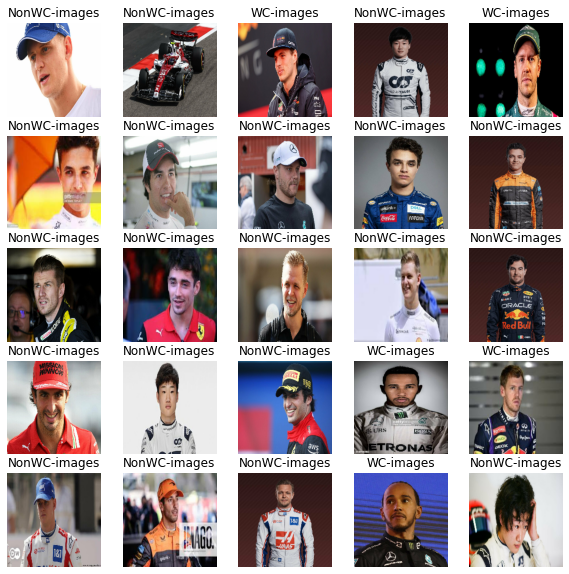

In [50]:
class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [51]:
val_batches = tf.data.experimental.cardinality(validation_dataset)
test_dataset = validation_dataset.take(val_batches // 2)
val_dataset = validation_dataset.skip(val_batches // 2)

In [52]:
print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))

Number of validation batches: 4
Number of test batches: 2


In [53]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

In [54]:
with tf.device('/cpu:0'):
    data_augmentation = tf.keras.Sequential([
      tf.keras.layers.RandomFlip('horizontal'),
      tf.keras.layers.RandomRotation(0.2),
    ])

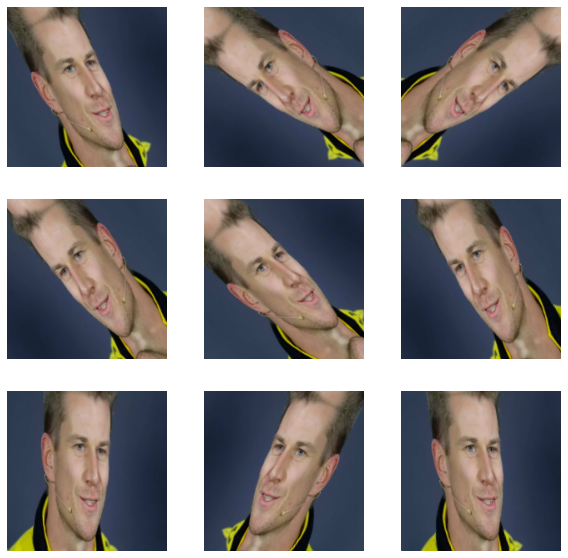

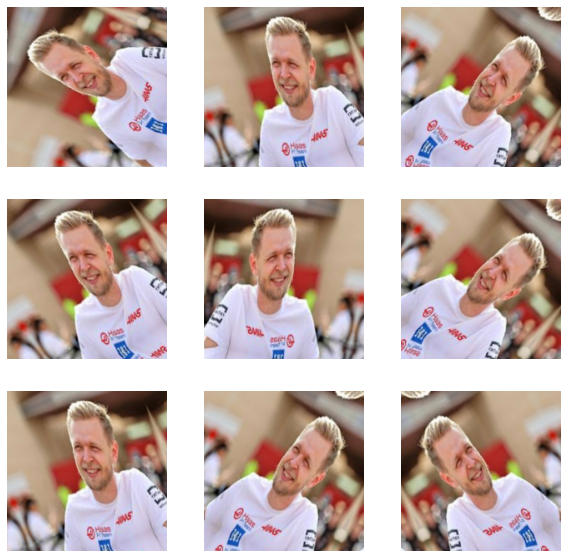

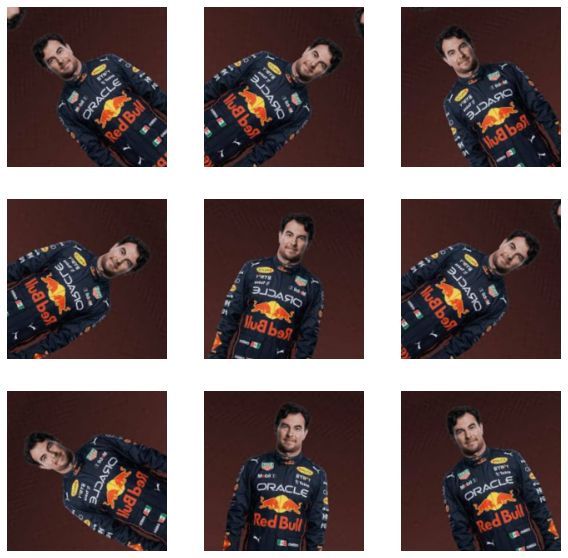

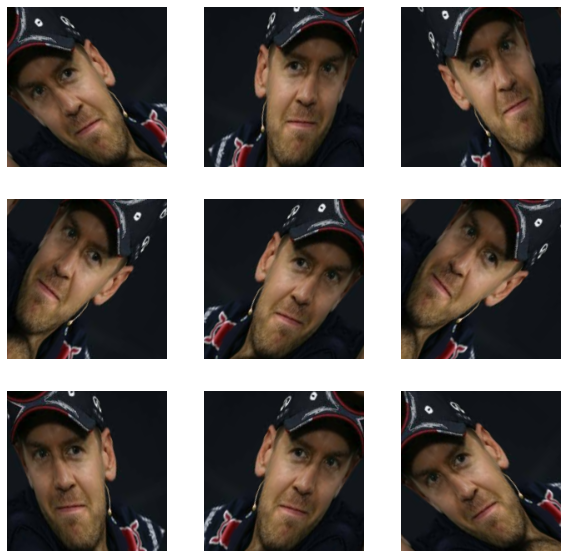

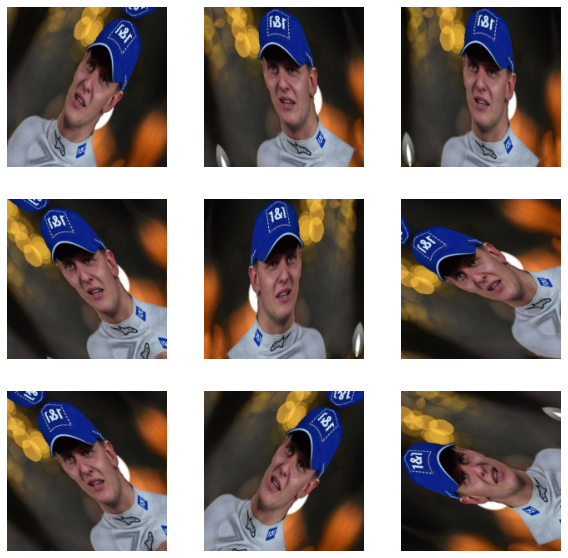

In [55]:
with tf.device('/cpu:0'):
    for image, _ in train_dataset.take(5):
      plt.figure(figsize=(10, 10))
      first_image = image[0]
      for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
        plt.imshow(augmented_image[0] / 255)
        plt.axis('off')

In [56]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [57]:
#rescale = tf.keras.layers.Rescaling(1./127.5, offset=-1)

In [58]:
# Create the base model from the pre-trained model MobileNet V2

IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

In [59]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 6, 6, 1280)


In [60]:
base_model.trainable = False

In [61]:
base_model.summary()

Model: "mobilenetv2_1.00_192"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 192, 192, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 96, 96, 32)   864         ['input_3[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 96, 96, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 96, 96, 32)   0           ['bn_Conv1[0][

In [62]:
inputs = tf.keras.Input(shape=IMG_SHAPE)
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False) #We need to set `training=False` as our model contains a `BatchNormalization` layer. More explanation here https://www.tensorflow.org/guide/keras/transfer_learning
x = tf.keras.layers.GlobalAveragePooling2D()(x) #this layer has the same purpose as tf.keras.layers.Flatten(). Need to connect something 2D to something 1D. Ask if you want to know more :)
#x = tf.keras.layers.Dense(10, activation="relu")(x)
#x = tf.keras.layers.Dropout(0.2)(x)
#x = tf.keras.layers.Dense(5, activation="relu")(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(1, activation="sigmoid")(x) 
model = tf.keras.Model(inputs, outputs)

In [63]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [64]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 192, 192, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 192, 192, 3)       0         
                                                                 
 tf.math.truediv_1 (TFOpLamb  (None, 192, 192, 3)      0         
 da)                                                             
                                                                 
 tf.math.subtract_1 (TFOpLam  (None, 192, 192, 3)      0         
 bda)                                                            
                                                                 
 mobilenetv2_1.00_192 (Funct  (None, 6, 6, 1280)       2257984   
 ional)                                                          
                                                           

In [65]:
initial_epochs = 20

loss0, accuracy0 = model.evaluate(validation_dataset)

4/4 [==============================] - 3s 297ms/step - loss: 0.7382 - accuracy: 0.5000


In [66]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 0.74
initial accuracy: 0.50


In [67]:
history = model.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=validation_dataset)

Epoch 1/20
13/13 [==============================] - 10s 580ms/step - loss: 0.6488 - accuracy: 0.6298 - val_loss: 0.6352 - val_accuracy: 0.6635
Epoch 2/20
13/13 [==============================] - 8s 570ms/step - loss: 0.5422 - accuracy: 0.7620 - val_loss: 0.6054 - val_accuracy: 0.7308
Epoch 3/20
13/13 [==============================] - 7s 531ms/step - loss: 0.5060 - accuracy: 0.7957 - val_loss: 0.6051 - val_accuracy: 0.7308
Epoch 4/20
13/13 [==============================] - 7s 533ms/step - loss: 0.5168 - accuracy: 0.7885 - val_loss: 0.6088 - val_accuracy: 0.7308
Epoch 5/20
13/13 [==============================] - 7s 534ms/step - loss: 0.4476 - accuracy: 0.8245 - val_loss: 0.6110 - val_accuracy: 0.7404
Epoch 6/20
13/13 [==============================] - 7s 533ms/step - loss: 0.5062 - accuracy: 0.8173 - val_loss: 0.6021 - val_accuracy: 0.7308
Epoch 7/20
13/13 [==============================] - 7s 531ms/step - loss: 0.5042 - accuracy: 0.8125 - val_loss: 0.6003 - val_accuracy: 0.7404
Epoch

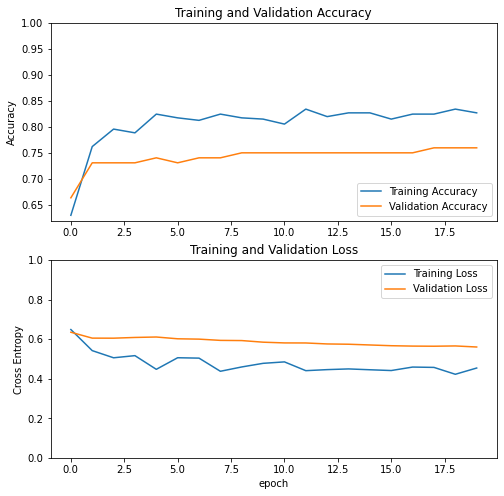

In [68]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [69]:
base_model.trainable = True

In [70]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  154


In [83]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              metrics=['accuracy'])

In [84]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 192, 192, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 192, 192, 3)       0         
                                                                 
 tf.math.truediv_1 (TFOpLamb  (None, 192, 192, 3)      0         
 da)                                                             
                                                                 
 tf.math.subtract_1 (TFOpLam  (None, 192, 192, 3)      0         
 bda)                                                            
                                                                 
 mobilenetv2_1.00_192 (Funct  (None, 6, 6, 1280)       2257984   
 ional)                                                          
                                                           

In [85]:
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_dataset)

Epoch 20/30
13/13 [==============================] - 14s 754ms/step - loss: 1.1453 - accuracy: 0.7812 - val_loss: 0.5012 - val_accuracy: 0.7692
Epoch 21/30
13/13 [==============================] - 10s 722ms/step - loss: 0.4035 - accuracy: 0.8462 - val_loss: 0.4710 - val_accuracy: 0.7692
Epoch 22/30
13/13 [==============================] - 10s 725ms/step - loss: 0.3507 - accuracy: 0.8654 - val_loss: 0.4361 - val_accuracy: 0.8269
Epoch 23/30
13/13 [==============================] - 10s 726ms/step - loss: 0.4131 - accuracy: 0.8077 - val_loss: 0.4529 - val_accuracy: 0.7885
Epoch 24/30
13/13 [==============================] - 10s 728ms/step - loss: 0.3173 - accuracy: 0.8726 - val_loss: 0.5277 - val_accuracy: 0.7788
Epoch 25/30
13/13 [==============================] - 10s 726ms/step - loss: 0.2949 - accuracy: 0.8918 - val_loss: 0.4046 - val_accuracy: 0.8365
Epoch 26/30
13/13 [==============================] - 10s 725ms/step - loss: 0.2545 - accuracy: 0.9038 - val_loss: 0.6537 - val_accuracy:

In [86]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

TypeError: unsupported operand type(s) for +=: 'float' and 'list'

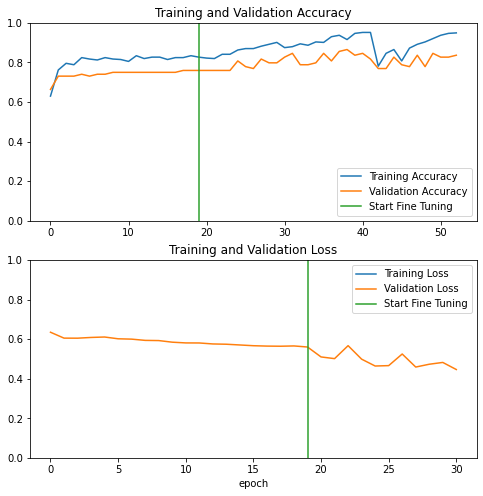

In [87]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [91]:
loss, accuracy = model.evaluate(test_dataset)
print('Test accuracy :', accuracy)

2/2 [==============================] - 1s 489ms/step - loss: 0.2836 - accuracy: 0.8906
Test accuracy : 0.890625


Predictions:
 [0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1]
Labels:
 [0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 1 0 1 0 1]


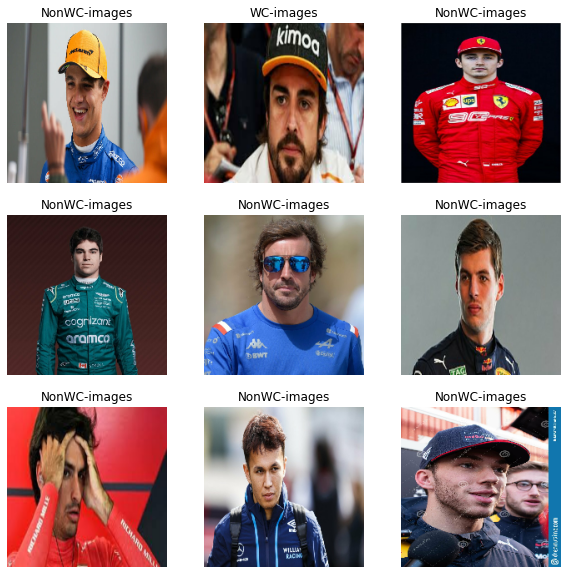

In [92]:
# Retrieve a batch of images from the test set
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch).flatten()

predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names[predictions[i]])
  plt.axis("off")

In [93]:
img = tf.keras.utils.load_img("Kanye.jpg", target_size=(192,192)# your own image
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Add the image to a batch where it's the only member.


prediction = model.predict_on_batch(img_array).flatten()

prediction = tf.where(prediction < 0.5, 0, 1)


print(
    "This image most likely belongs to {}."
    .format(class_names[prediction[0]])
)

plt.imshow(img)

FileNotFoundError: [Errno 2] No such file or directory: 'Kanye.jpg'